# 1) Introdução

   Este projeto tem o objetivo de analisar a possível relação de crescimento urbano e taxa de emprego(entre 15 e 24 anos)
com o IDH de um país no ano de 2007, utilizando-se de tabelas e gráficos para ser possível chegar a uma correlação  entre 
esses dados.                                     
Para nortear esse projeto foi utilizada a seguinte pergunta: Qual é a relação existente do crescimento urbano e taxa de emprego com o IDH de um país? 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

idh = pd.read_excel('hdi_human_development_index.xlsx')
emprego = pd.read_excel('aged_15_24_employment_rate_percent.xlsx')
crescimento = pd.read_excel('urban_population_growth_annual_percent.xlsx')

In [30]:
idh.head(3)

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745


In [31]:
emprego.head(3)

,geo,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,50.4,50.2,50.4,50.0,50.0,50.0,50.1,50.1,50.1,50.2,50.8,50.6,47.8,50.0,45.9,48.8,48.0
1,Albania,38.9,38.5,38.6,38.8,38.8,38.2,38.4,38.1,37.7,37.4,37.0,36.8,36.4,35.9,35.5,35.2,35.6
2,Algeria,25.4,24.7,25.2,25.1,23.7,24.6,25.3,24.8,24.3,23.2,24.9,25.7,26.9,31.0,32.5,34.8,34.0


In [32]:
crescimento.head(3)

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,5.26,5.31,5.37,5.40,5.46,5.48,5.51,5.51,5.57,...,4.25,4.02,4.09,4.35,4.64,4.83,4.89,4.76,4.53,4.28
1,Albania,5.39,3.89,3.29,3.18,3.11,2.98,2.86,2.86,3.07,...,1.49,1.44,1.47,1.61,1.79,1.85,1.74,1.63,1.46,1.51
2,Algeria,5.52,6.62,6.83,6.76,6.74,6.73,5.89,3.26,3.30,...,2.70,2.76,2.81,2.87,2.93,2.97,2.96,2.89,2.77,2.64


In [6]:
idh_2007 = idh.loc[:, ['geo',2007]]

In [7]:
emprego_2007 = emprego.loc[:, ['geo',2007]]

In [8]:
crescimento_2007 = crescimento.loc[:, ['geo',2007]]

In [9]:
idh_idx = idh_2007.set_index('geo')

In [10]:
emprego_idx = emprego_2007.set_index('geo')

In [11]:
crescimento_idx = crescimento_2007.set_index('geo')

In [33]:
idh_idx.head(3)

,2007
geo,
Afghanistan,0.433
Albania,0.713
Algeria,0.697


In [34]:
emprego_idx.head(3)

,2007
geo,
Afghanistan,48.0
Albania,35.6
Algeria,34.0


In [35]:
crescimento_idx.head(3)

,2007
geo,
Afghanistan,4.25
Albania,1.49
Algeria,2.70


In [15]:
df = idh_idx.join(emprego_idx, how='inner', lsuffix='_idh', rsuffix='_empl')
df.head()

,2007_idh,2007_empl
geo,,
Afghanistan,0.433,48.0
Albania,0.713,35.6
Algeria,0.697,34.0
Angola,0.468,67.7
Argentina,0.792,39.0


In [16]:
data = df.join(crescimento_idx, how='inner')
data.rename(columns = {2007:'2007_urb_grw'}, inplace = True)

In [17]:
data.head(10)

,2007_idh,2007_empl,2007_urb_grw
geo,,,
Afghanistan,0.433,48.0,4.250
Albania,0.713,35.6,1.490
Algeria,0.697,34.0,2.700
Angola,0.468,67.7,5.650
Argentina,0.792,39.0,1.230
Armenia,0.721,25.6,-0.915
Australia,0.921,64.3,0.792
Austria,0.864,52.5,0.333
Azerbaijan,0.719,39.2,1.520


# 2.1) Taxa de IDH (2007)

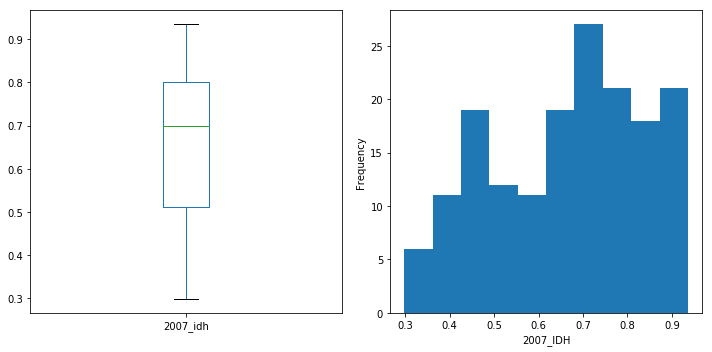

count    165.000000
mean       0.662042
std        0.168359
min        0.298000
25%        0.511000
50%        0.698000
75%        0.800000
max        0.936000
Name: 2007_idh, dtype: float64

In [18]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot = data['2007_idh'].plot.box()

plt.subplot(122)
plot= data['2007_idh'].plot.hist()
plt.xlabel('2007_IDH')
plt.tight_layout()
plt.show()


data['2007_idh'].describe()

# 2.2) Taxa de Emprego de Pessoas entre 15 e 24 anos (2007)

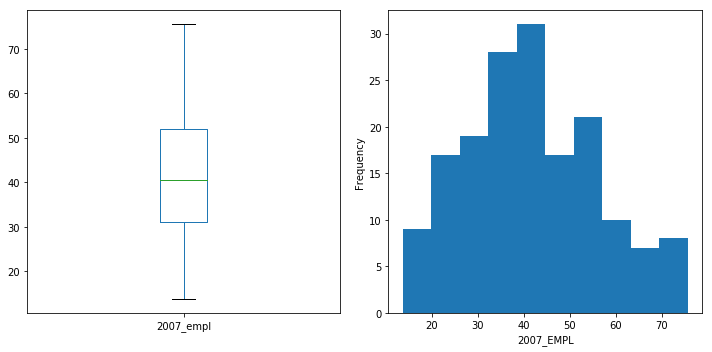

count    167.000000
mean      41.744910
std       14.414165
min       13.700000
25%       31.050000
50%       40.600000
75%       51.950000
max       75.700000
Name: 2007_empl, dtype: float64

In [19]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot = data['2007_empl'].plot.box()

plt.subplot(122)
plot= data['2007_empl'].plot.hist()
plt.xlabel('2007_EMPL')
plt.tight_layout()
plt.show()


data['2007_empl'].describe()

# 2.3) Taxa de Crescimento Urbano (2007)

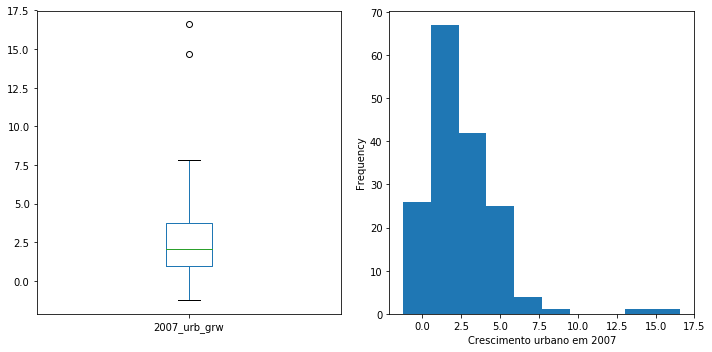

count    167.000000
mean       2.472322
std        2.351161
min       -1.230000
25%        0.946500
50%        2.070000
75%        3.765000
max       16.600000
Name: 2007_urb_grw, dtype: float64

In [29]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot = data['2007_urb_grw'].plot.box()

plt.subplot(122)
plot= data['2007_urb_grw'].plot.hist()
plt.xlabel('Crescimento urbano em 2007')
plt.tight_layout()
plt.show()


data['2007_urb_grw'].describe()

# 3.1) Correlação entre IDH e Taxa de Emprego(15 a 24 anos)

In [26]:
correlação = data.corr()

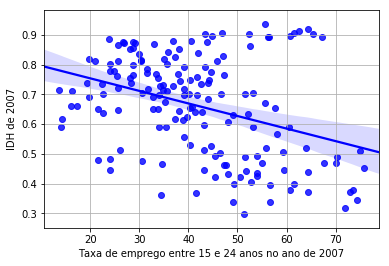

Correlação: -0.36384884734853473



In [27]:
sns.regplot(data['2007_empl'], data['2007_idh'], color = ('blue'))
plt.xlabel('Taxa de emprego entre 15 e 24 anos no ano de 2007')
plt.ylabel('IDH de 2007')
plt.grid()
plt.show()

print('Correlação: {0}\n'.format(correlação['2007_empl']['2007_idh']))

Com este gráfico é possivel notar que a taxa de emprego de pessoas entre 15 e 24 anos interfere muito pouco com o IDH de tal 
país, como prova disso há a taxa de correlação acima que demontra a baixa correlação entre as duas variaveis por causa da distancia entre os pontos apresentados.

# 3.2) Correlação entre IDH e Crescimento Urbano 

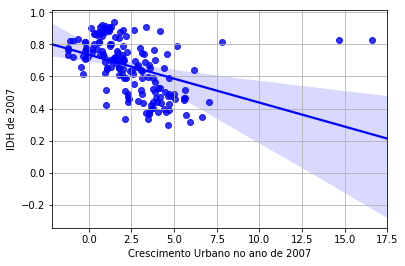

Correlação: -0.41811168742885796



In [44]:
sns.regplot(data['2007_urb_grw'], data['2007_idh'], color = ('blue'))
plt.xlabel('Crescimento Urbano no ano de 2007')
plt.ylabel('IDH de 2007')
plt.grid(True)
plt.show()

print('Correlação: {0}\n'.format(correlação['2007_urb_grw']['2007_idh']))

Assim como o gráfico da taxa de emprego com o IDH, este mostra que o crescimento urbano quase não interfere com com o IDH do
país. Isso podendo ser visto novamente pela taxa de correlação que por ser um numero baixo prova que não há correlação entre 
as duas variáveis estudadas.

# 4) Conclusão 

Concluindo o projeto é possível ver que a taxa de emprego entre 15 e 24 anos(2007) e a taxa de crescimento urbano(2007) não interferem muito com o IDH(2007), assim respondendo a pergunto no começo mostrando que não há relação entre as variaveis utilizadas (emprego e crescimento urbano) com o IDH.